#### Goal: create a plot that compares the aminoacidic frequencies of the SP in our dataset with the aminoacidic frequencies of the swissprot

### Step1: compute the aa frequencies of the SPs in our dataset

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#set the theme
sns.set_theme(
    context="paper",
    style="darkgrid",
    palette="deep",
    font="sans-serif",
    font_scale=1,
    color_codes=True,
    rc=None    
)

In [52]:
# take the .tsv with all the data and put it in a dataframe
dataset=pd.read_csv("../Data_Preparation/train_bench.tsv" , sep="\t")
print(len(dataset))
dataset.head()

10027


,EntryID,OrganismName,Kingdom,SequenceLength,HelixDomain,Class,SPStart,SPEnd,Set,Sequence
0,P32266,Saccharomyces cerevisiae (strain ATCC 204508 /...,Fungi,881,False,Negative,NaN,NaN,Benchmark,MNASPVRLLILRRQLATHPAILYSSPYIKSPLVHLHSRMSNVHRSA...
1,Q8N1N2,Homo sapiens,Metazoa,210,False,Negative,NaN,NaN,Benchmark,MVADIKGNEQIEKYSWREACDTGSSRMDRKHGKYILNVEHSENQPP...
2,Q94JY0,Arabidopsis thaliana,Viridiplantae,330,False,Negative,NaN,NaN,Benchmark,MGSISMHITPSTALPIRHFRARVSCCSSGHVSFIKDVAATEPPMHL...
3,Q8LDU1,Arabidopsis thaliana,Viridiplantae,321,False,Negative,NaN,NaN,Benchmark,MKSLVAHFSTPLITARLVPRCIIHRASISAVSFSTVRRRFSPLTMA...
4,Q9ZNT7,Arabidopsis thaliana,Viridiplantae,286,False,Negative,NaN,NaN,Benchmark,MSFNKVPNIPGAPALSALLKVSVIGGLGVYALTNSLYNVDGGHRAV...


In [53]:
# to keep only SP entries, keep sequences that have either SPStart and SPEnd column values different from null. 
sp_df=dataset[dataset["SPStart"].notna()]
print(len(sp_df))
sp_df.head()

1093


,EntryID,OrganismName,Kingdom,SequenceLength,HelixDomain,Class,SPStart,SPEnd,Set,Sequence
1787,Q9H7M9,Homo sapiens,Metazoa,311,NaN,Positive,1.0,32.0,Benchmark,MGVPTALEAGSWRWGSLLFALFLAASLGPVAAFKVATPYSLYVCPE...
1788,Q8SXL2,Drosophila melanogaster,Metazoa,136,NaN,Positive,1.0,24.0,Benchmark,MKSTISLLLVVICTVVLAAQQSQAKKGCQAYGHVCYGGHGKRSLSP...
1789,P27731,Gallus gallus,Metazoa,150,NaN,Positive,1.0,20.0,Benchmark,MAFHSTLLVFLAGLVFLSEAAPLVSHGSVDSKCPLMVKVLDAVRGS...
1790,P31419,Manduca sexta,Metazoa,161,NaN,Positive,1.0,20.0,Benchmark,MVNRLILMVVVVFITDSVMGTAEVMSHVTAHFGKALEECREESGLP...
1791,Q8MVA6,Ixodes scapularis,Metazoa,69,NaN,Positive,1.0,23.0,Benchmark,MRAVAIFIVTLLVLECVYFVMSEPDPGQPWQVKAGRPPCYSIPCRK...


In [54]:
# reduce the dataframe to keep only the columns of interest
sp_seqs=sp_df[["EntryID" , "Sequence" , "SPStart" , "SPEnd" , "Set"]]
print(len(sp_seqs))
sp_seqs.head()

1093


,EntryID,Sequence,SPStart,SPEnd,Set
1787,Q9H7M9,MGVPTALEAGSWRWGSLLFALFLAASLGPVAAFKVATPYSLYVCPE...,1.0,32.0,Benchmark
1788,Q8SXL2,MKSTISLLLVVICTVVLAAQQSQAKKGCQAYGHVCYGGHGKRSLSP...,1.0,24.0,Benchmark
1789,P27731,MAFHSTLLVFLAGLVFLSEAAPLVSHGSVDSKCPLMVKVLDAVRGS...,1.0,20.0,Benchmark
1790,P31419,MVNRLILMVVVVFITDSVMGTAEVMSHVTAHFGKALEECREESGLP...,1.0,20.0,Benchmark
1791,Q8MVA6,MRAVAIFIVTLLVLECVYFVMSEPDPGQPWQVKAGRPPCYSIPCRK...,1.0,23.0,Benchmark


In [55]:
# inizialise two dictionaries that contain all the proteogenic aa. One for benchmark and one for training
aa_bench = { "A" : 0 , "R" : 0 , "N" : 0 , "D" : 0 , "C" : 0 , "Q" : 0, "E" : 0, "G" : 0, "H" : 0, "I" : 0 ,"L" : 0, "K" : 0, "M" : 0, "F" : 0, "P" : 0, "S" : 0, "T" : 0, "W" : 0, "Y" : 0 , "V": 0}
aa_train = { "A" : 0 , "R" : 0 , "N" : 0 , "D" : 0 , "C" : 0 , "Q" : 0, "E" : 0, "G" : 0, "H" : 0, "I" : 0 ,"L" : 0, "K" : 0, "M" : 0, "F" : 0, "P" : 0, "S" : 0, "T" : 0, "W" : 0, "Y" : 0 , "V": 0}

# inizialise the total count of the residues in the sequences
total_residues_bench = 0
total_residues_train = 0
for index , row in sp_seqs.iterrows():
    start = int(row["SPStart"])
    end = int(row["SPEnd"])
    #slice the sequence to the interval that contains the signal peptide
    signal_peptide_seq = str(row["Sequence"])
    signal_peptide_seq = signal_peptide_seq[start-1:end] #we put start -1 because the index needs to start at 0
    # count the residues in the current sequence
    for residue in signal_peptide_seq:
        if residue in aa_bench.keys() and row["Set"] == "Benchmark":
            aa_bench[residue] = aa_bench[residue] + 1
            total_residues_bench = total_residues_bench + 1
        elif residue in aa_train.keys() and row["Set"] in "12345":
            aa_train[residue] = aa_train[residue] + 1
            total_residues_train = total_residues_train +1
            
print(aa_bench , total_residues_bench)     
print(aa_train , total_residues_train)
#now we have both the total number of residues for training and bench and a dictionary containing single residue data.

{'A': 674, 'R': 167, 'N': 49, 'D': 43, 'C': 153, 'Q': 110, 'E': 76, 'G': 335, 'H': 54, 'I': 213, 'L': 1127, 'K': 117, 'M': 319, 'F': 237, 'P': 174, 'S': 355, 'T': 235, 'W': 84, 'Y': 47, 'V': 422} 4991
{'A': 2901, 'R': 642, 'N': 201, 'D': 172, 'C': 570, 'Q': 400, 'E': 257, 'G': 1166, 'H': 225, 'I': 920, 'L': 4364, 'K': 437, 'M': 1265, 'F': 1016, 'P': 850, 'S': 1529, 'T': 881, 'W': 362, 'Y': 208, 'V': 1655} 20021


In [56]:
# divide every entry of the dictionary for the total number of residues to obtain the frequency
for residue in aa_bench.keys():
    aa_bench[residue] = aa_bench[residue] / total_residues_bench
for residue in aa_train.keys():
    aa_train[residue] = aa_train[residue] / total_residues_train
print(aa_train)
print(aa_bench)

{'A': 0.14489785724988763, 'R': 0.03206633035312922, 'N': 0.010039458568503072, 'D': 0.008590979471554867, 'C': 0.028470106388292293, 'Q': 0.019979022026871785, 'E': 0.012836521652265122, 'G': 0.05823884920833125, 'H': 0.011238199890115378, 'I': 0.0459517506618051, 'L': 0.21797113031317117, 'K': 0.021827081564357424, 'M': 0.06318365715998202, 'F': 0.050746715948254334, 'P': 0.042455421807102545, 'S': 0.0763698116977174, 'T': 0.0440037960141851, 'W': 0.018081014934318965, 'Y': 0.010389091453973327, 'V': 0.08266320363618201}
{'A': 0.13504307753957123, 'R': 0.033460228411140054, 'N': 0.009817671809256662, 'D': 0.008615507914245642, 'C': 0.030655179322781004, 'Q': 0.022039671408535362, 'E': 0.015227409336806252, 'G': 0.0671208174714486, 'H': 0.010819475055099179, 'I': 0.0426768182728912, 'L': 0.22580645161290322, 'K': 0.023442195952714885, 'M': 0.06391504708475255, 'F': 0.047485473852935285, 'P': 0.03486275295531958, 'S': 0.07112803045481868, 'T': 0.04708475255459828, 'W': 0.01683029453015

In [57]:
# as a safety check compute the sum of the frequencies, it should equal 1
freq_train_tot = 0
freq_bench_tot = 0
for residue in aa_bench.keys():
    freq_bench_tot = freq_bench_tot + aa_bench[residue] 
for residue in aa_train.keys():
    freq_train_tot = freq_train_tot + aa_train[residue]
print (freq_train_tot , freq_bench_tot) 

1.0 1.0


### Step2: create a dataframe with the aminoacidic frequencies to subsequently build the plot

In [58]:
# create a dictionary with the aminoacidic frequencies of the swiss prot
#   Ala (A) 8.25   Gln (Q) 3.93   Leu (L) 9.64   Ser (S) 6.65
#
#   Arg (R) 5.52   Glu (E) 6.71   Lys (K) 5.79   Thr (T) 5.36
#
#   Asn (N) 4.06   Gly (G) 7.07   Met (M) 2.41   Trp (W) 1.10
#
#   Asp (D) 5.46   His (H) 2.27   Phe (F) 3.86   Tyr (Y) 2.92
#
#   Cys (C) 1.38   Ile (I) 5.90   Pro (P) 4.74   Val (V) 6.85

In [59]:
swiss_frequencies = { "A" : 0.0825 , "R" : 0.0552 , "N" : 0.0406 , "D" : 0.0546 , "C" : 0.0138 , "Q" : 0.0393, "E" : 0.0671, "G" : 0.0707, "H" : 0.0227, "I" : 0.0590 ,"L" : 0.0964, "K" : 0.0579, "M" : 0.0241, "F" : 0.0386, "P" : 0.0474, "S" : 0.0665, "T" : 0.0536, "W" : 0.0110, "Y" : 0.0292 , "V": 0.0685}

In [69]:
# create the dataframes
bench_df = pd.DataFrame(aa_bench.items(), columns=["Residue", "Frequency"])
bench_df["Database"] = "Benchmark"
train_df = pd.DataFrame(aa_train.items(), columns=["Residue", "Frequency"])
train_df["Database"] = "Training"
swiss_df = pd.DataFrame(swiss_frequencies.items(), columns=["Residue", "Frequency"])
swiss_df["Database"] = "SwissProt"
bench_df.head()

,Residue,Frequency,Database
0,A,0.135043,Benchmark
1,R,0.033460,Benchmark
2,N,0.009818,Benchmark
3,D,0.008616,Benchmark
4,C,0.030655,Benchmark


In [70]:
# merge training and swissprot dataframes and benchmark and swissprot dataframes to obtain final dataframes we need
train_final = pd.concat([train_df , swiss_df], ignore_index=True)
bench_final = pd.concat([bench_df , swiss_df], ignore_index=True)
bench_final.head()

,Residue,Frequency,Database
0,A,0.135043,Benchmark
1,R,0.033460,Benchmark
2,N,0.009818,Benchmark
3,D,0.008616,Benchmark
4,C,0.030655,Benchmark


In [71]:
bench_final.tail()

,Residue,Frequency,Database
35,S,0.0665,SwissProt
36,T,0.0536,SwissProt
37,W,0.0110,SwissProt
38,Y,0.0292,SwissProt
39,V,0.0685,SwissProt


In [73]:
bench_final.query("Residue == 'A'")

,Residue,Frequency,Database
0,A,0.135043,Benchmark
20,A,0.082500,SwissProt


### Step3: Create the plot

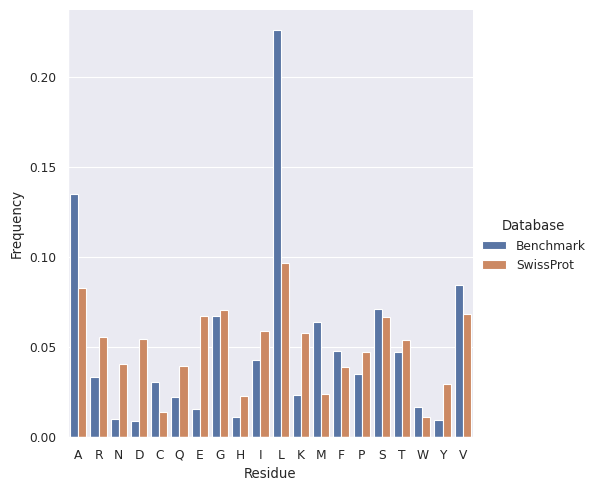

In [80]:
bench_plot = sns.catplot(
 data=bench_final,
 x="Residue",
 y="Frequency",
 hue="Database",
 kind="bar"
)

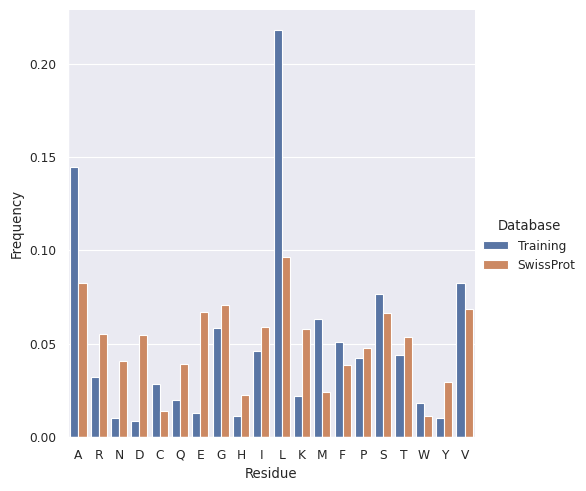

In [79]:
train_plot = sns.catplot(
 data=train_final,
 x="Residue",
 y="Frequency",
 hue="Database",
 kind="bar"
)

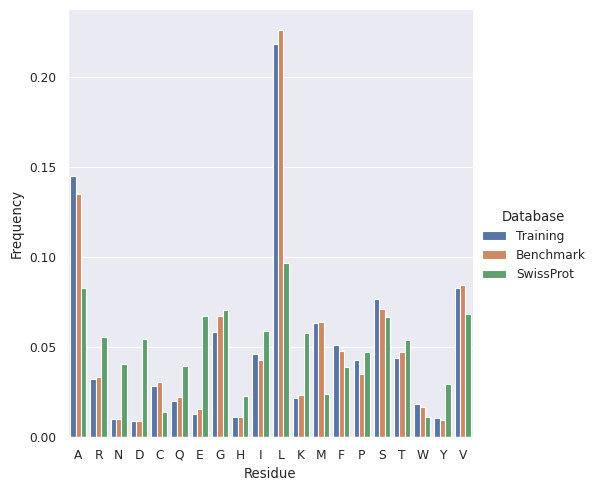

In [88]:
total_final = pd.concat([train_df , bench_df , swiss_df] , ignore_index=True)
total_plot = sns.catplot(
 data=total_final,
 x="Residue",
 y="Frequency",
 hue="Database",
 kind="bar",
)